<h1>HoVerNet + Epithelium Output - View One Nucleus</h1>

1. Run the following two cells for the required functions.

In [2]:
import sys
sys.path.append('../')

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import json
import openslide

#from misc.wsi_handler import get_file_handler
#from misc.viz_utils import visualize_instances_dict

In [17]:
def get_folder_name(tile_id):
 
    spl = tile_id.split("_")
    folder_name = spl[0] + "_" + spl[1]
  
    return folder_name

def get_image(tile_id):

    image_file_name = os.path.join(seg_image_path, get_folder_name(tile_id), tile_id + ".png")
    image = cv2.imread(image_file_name)
    print(image_file_name)
    # convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

def load_nucleus_info(tile_id):

    # load the json file and add the contents to corresponding lists
    json_path = os.path.join(tile_json_path, tile_id + '.json')

    nuc_list = []
    bbox_list = []
    centroid_list = []
    contour_list = [] 
        #type_list = []

    with open(json_path) as json_file:
        data = json.load(json_file)
        mag_info = data['mag']
        nuc_info = data['nuc']
        for inst in nuc_info:
            nuc_list.append(inst)
            inst_info = nuc_info[inst]
            inst_centroid = inst_info['centroid']
            centroid_list.append(inst_centroid)
            inst_contour = inst_info['contour']
            contour_list.append(inst_contour)
            inst_bbox = inst_info['bbox']
            bbox_list.append(inst_bbox)
            #inst_type = inst_info['type']
            #type_list.append(inst_type)

    return nuc_list, centroid_list, contour_list, bbox_list

def draw_overlay(nuc_centroid, nuc_contour, nuc_bbox, image):

    # draw the overlays
    overlay = image.copy()
    nuc_ellipse = cv2.fitEllipse(np.array(nuc_contour))
    print("Ellipse params (centroid, minor axis, major axis, orientation):")
    print(nuc_ellipse)
    overlay = cv2.ellipse(overlay.astype('uint8'), nuc_ellipse, (255,0,0), 2)
    overlay = cv2.drawContours(overlay.astype('uint8'), [np.array(nuc_contour)], -1, (255,255,0), 1)
    #overlay = cv2.circle(overlay.astype('uint8'),(np.round(nuc_centroid[0]).astype('int'), np.round(nuc_centroid[1]).astype('int')), 3, (0,255,0), -1)
    #overlay = cv2.rectangle(overlay.astype('uint8'), (nuc_bbox[0][1], nuc_bbox[0][0]), (nuc_bbox[1][1], nuc_bbox[1][0]), (255,0,0), 1)


    pad = 120
    crop1 = nuc_bbox[0][0]-pad
    if crop1 < 0: 
        crop1 = 0
    crop2 = nuc_bbox[1][0]+pad
    if crop2 > overlay.shape[0]: 
        crop2 = overlay.shape[0]
    crop3 = nuc_bbox[0][1]-pad
    if crop3 < 0: 
        crop3 = 0
    crop4 = nuc_bbox[1][1]+pad
    if crop4 > overlay.shape[1]: 
        crop4 = overlay.shape[1]
    crop_overlay = overlay[crop1:crop2,crop3:crop4,:]
    plt.figure(figsize=(10,10))

    plt.imshow(crop_overlay)
    plt.axis('off')
    plt.title('Overlay', fontsize=25)
    plt.show()

# Paths to files
seg_image_path = '/home/ret58/rds/hpc-work/epithelium_slides_hi_res/images/'
tile_json_path = "/home/ret58/rds/hpc-work/hover_net/consep_hi_res/json"



2. Update the tile ID below to set which image to use.

1182_16
/home/ret58/rds/hpc-work/epithelium_slides_hi_res/images/1182_16/1182_16_10224_10224.png


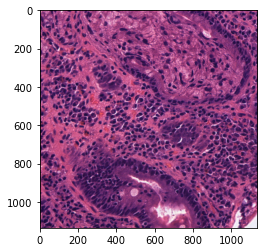

In [18]:
# Tile ID and nucleus ID, image path
tile_id = "1182_16_10224_10224"

# Show whole tile
image = get_image(tile_id)
plt.imshow(image)

# Get info for all nuclei
nuc_list, centroid_list, contour_list, bbox_list = load_nucleus_info(tile_id)

3. Update nuc_id below to show the overlay for the desired nucleus.

Ellipse params (centroid, minor axis, major axis, orientation):
((1131.8475341796875, 454.92620849609375), (11.062129020690918, 22.16119384765625), 76.93053436279297)


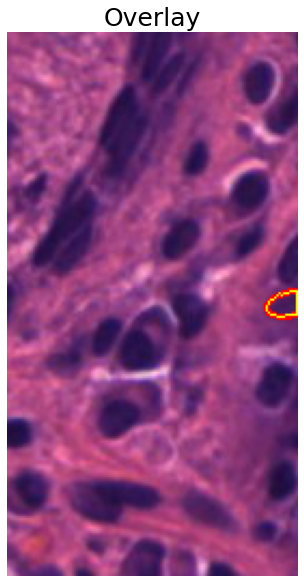

In [19]:
# Show overlay on one nucleus
nuc_id = "508"

index = nuc_list.index(nuc_id)

nuc_centroid = centroid_list[index]
nuc_contour = contour_list[index]
nuc_bbox = bbox_list[index]

draw_overlay(nuc_centroid, nuc_contour, nuc_bbox, image)